<a href="https://colab.research.google.com/github/Vikry99/finalProjectDataScience/blob/main/Final_Project_Anaconda_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import LibraRy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, AffinityPropagation, Birch

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Vikry99/dataset/3faa50a057e69164d00206a45606f42f509a13ff/Europe%20Hotel%20Booking%20Satisfaction%20Score.csv')
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


# Cleaning Data

In [ ]:
df.head(5)

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Hotel wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival convenience,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Hotel location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Stay comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0
Common Room entertainment,103904.0,3.358158,1.332991,0.0,2.00,4.0,4.00,5.0
Checkin/Checkout service,103904.0,3.304290,1.265396,0.0,3.00,3.0,4.00,5.0


# Exploratory Data Analyst

Shape

In [ ]:
df.shape[0]

103904

In [ ]:
df.shape[1]

17

Missing Value ?

In [ ]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Gender,103904,2,Female,52727
purpose_of_travel,103904,5,tourism,32053
Type of Travel,103904,2,Group Travel,71655
Type Of Booking,103904,3,Group bookings,49665
satisfaction,103904,2,neutral or dissatisfied,58879


In [ ]:
print(df['Type Of Booking'].value_counts())
print(df['Type Of Booking'].value_counts(normalize=True))

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64
Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: Type Of Booking, dtype: float64


In [ ]:
xd= df[df['Type Of Booking'].apply(lambda x: x.startswith('Not defined'))].index
df = df.drop(xd)
df = df.reset_index(drop=True)
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
1,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
2,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
3,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
4,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied


In [ ]:
df.shape

(96410, 17)

Any duplicat again ?

In [ ]:
df["id"].duplicated().sum()

0

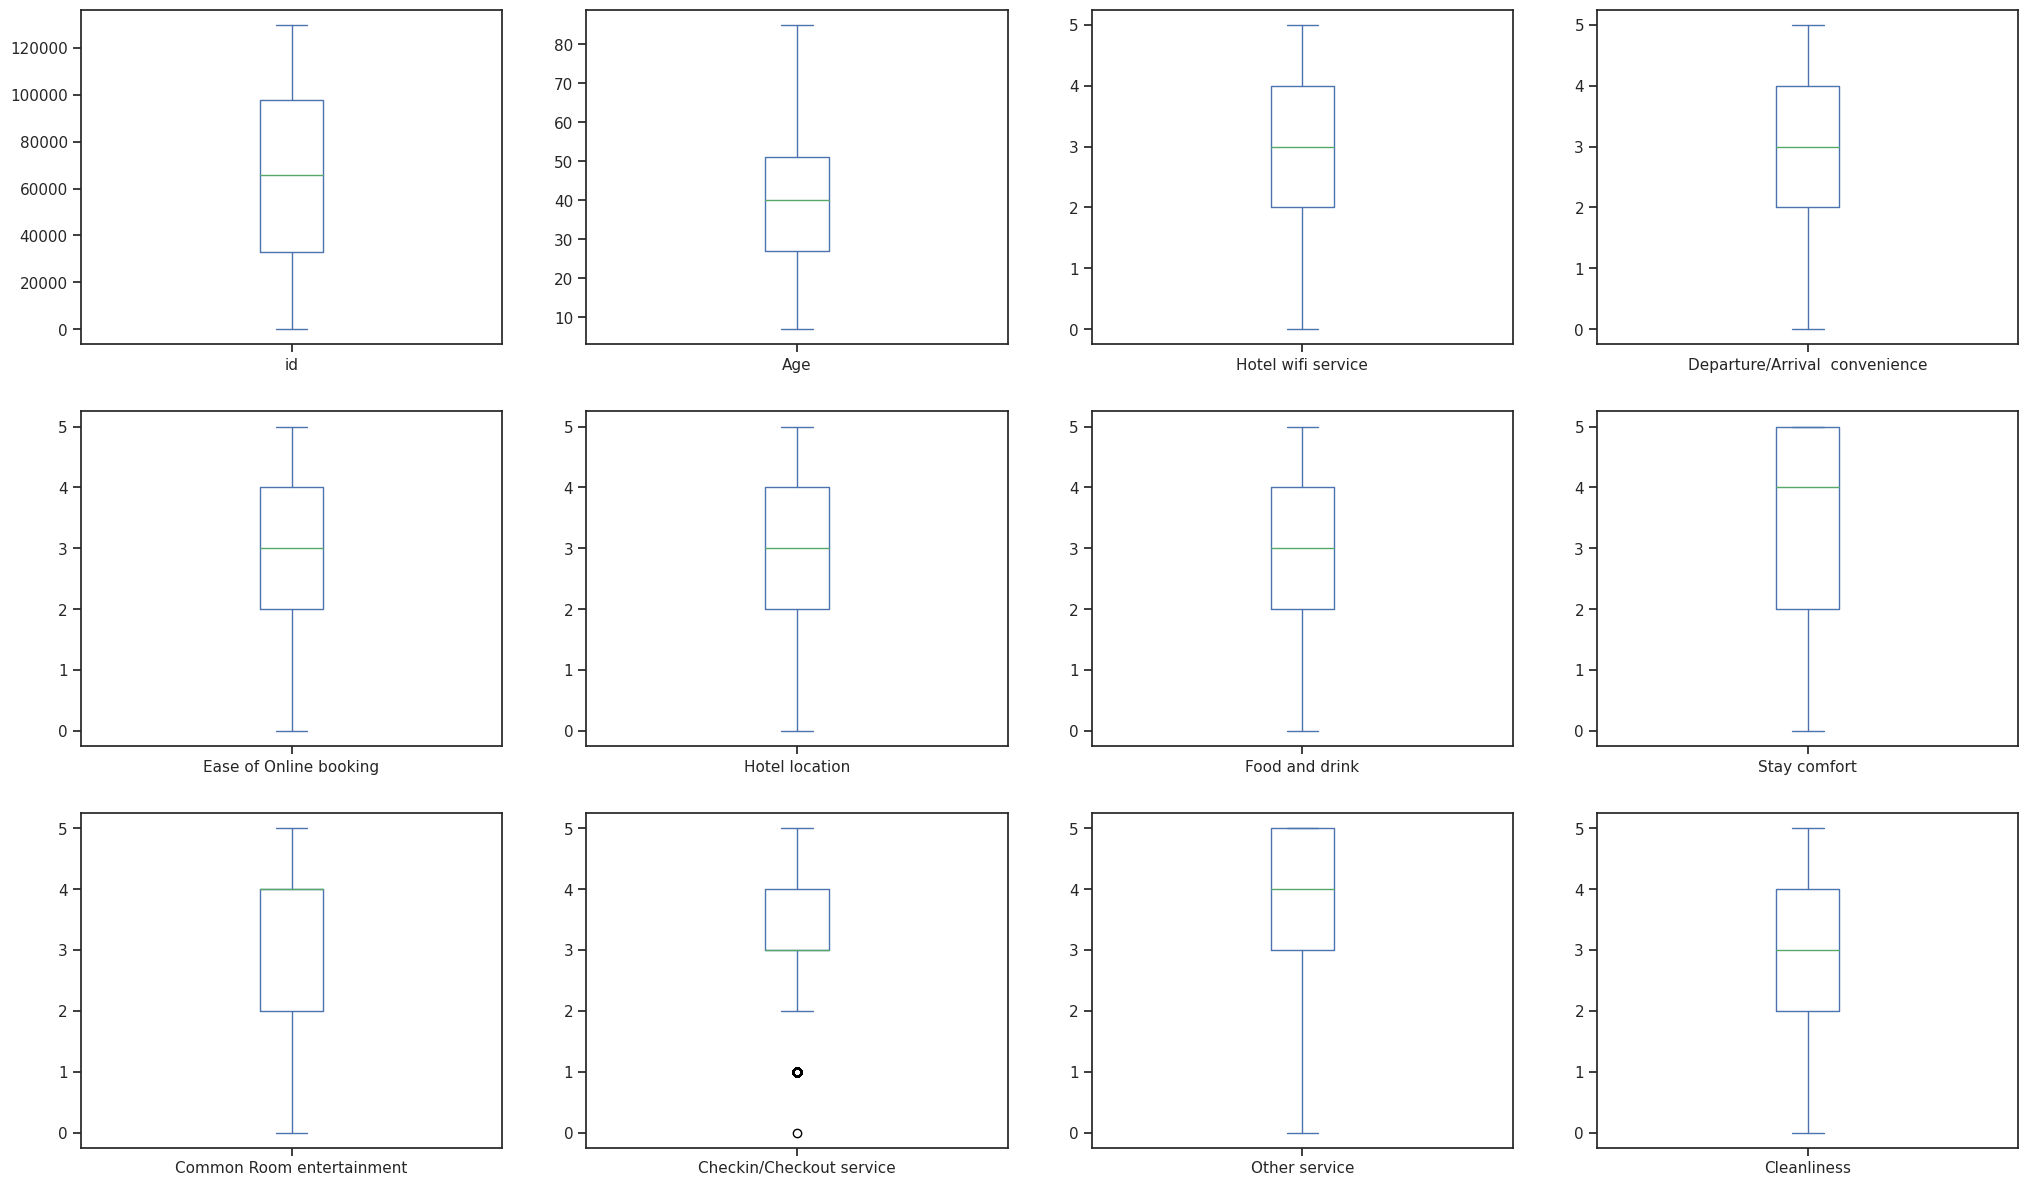

In [ ]:
df.plot(kind = 'box', subplots=True, figsize=(25,20), layout = (4,4))
plt.show()

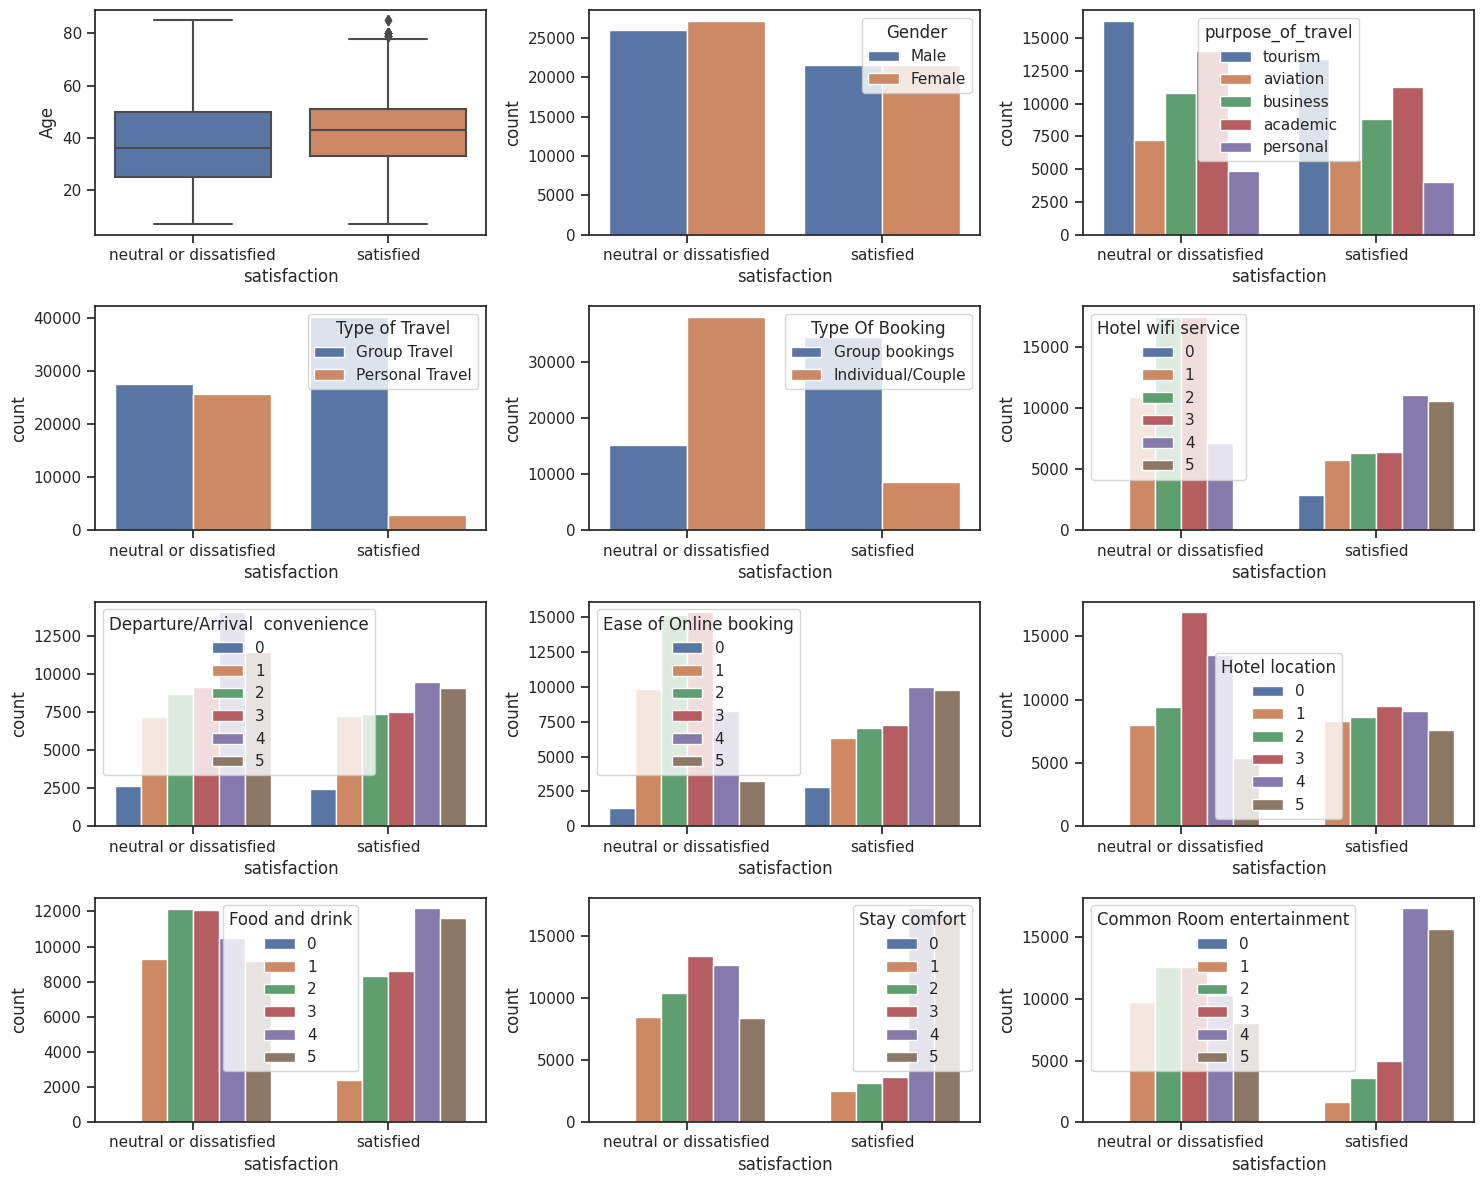

In [ ]:
# Set the style of the plots
sns.set(style="ticks")

# Create subplots for multiple plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Plot the relationships between satisfaction and other variables
sns.boxplot(x="satisfaction", y="Age", data=df, ax=axes[0, 0])
sns.countplot(x="satisfaction", hue="Gender", data=df, ax=axes[0, 1])
sns.countplot(x="satisfaction", hue="purpose_of_travel", data=df, ax=axes[0, 2])
sns.countplot(x="satisfaction", hue="Type of Travel", data=df, ax=axes[1, 0])
sns.countplot(x="satisfaction", hue="Type Of Booking", data=df, ax=axes[1, 1])
sns.countplot(x="satisfaction", hue="Hotel wifi service", data=df, ax=axes[1, 2])
sns.countplot(x="satisfaction", hue="Departure/Arrival  convenience", data=df, ax=axes[2, 0])
sns.countplot(x="satisfaction", hue="Ease of Online booking", data=df, ax=axes[2, 1])
sns.countplot(x="satisfaction", hue="Hotel location", data=df, ax=axes[2, 2])
sns.countplot(x="satisfaction", hue="Food and drink", data=df, ax=axes[3, 0])
sns.countplot(x="satisfaction", hue="Stay comfort", data=df, ax=axes[3, 1])
sns.countplot(x="satisfaction", hue="Common Room entertainment", data=df, ax=axes[3, 2])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Penjelasan mengenai data diatas


# PREPROCESSING

## Encode data
One hot encode

In [ ]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
1,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
2,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
3,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
4,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied


In [ ]:
def age_category(age):
  if age < 40:
    return "Young"
  elif age > 60:
    return "Old"
  else:
    return "Middle"

df['age_category'] = df['Age'].apply(lambda age: age_category(age))

def ohe (df_,variable,top_x_labels):
  for label in top_x_labels:
    df_[variable + '_' + label] = np.where(df[variable]==label,1,0)

# Purpose_of_travel
oh = [x for x in df['purpose_of_travel'].value_counts().sort_values(ascending=False).head().index]
ohe(df,'purpose_of_travel',oh)
df = df.drop(['purpose_of_travel'], axis=1)

# Type_of_travel
oh = [x for x in df['Type of Travel'].value_counts().sort_values(ascending=False).head().index]
ohe(df,'Type of Travel',oh)
df = df.drop(['Type of Travel'], axis=1)

# Type_of_booking
oh= [x for x in df['Type Of Booking'].value_counts().sort_values(ascending=False).head().index]
ohe(df,'Type Of Booking',oh)
df = df.drop(['Type Of Booking'], axis=1)

df = df.drop(['age_category'], axis=1)


df.head()

,id,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,satisfaction,purpose_of_travel_tourism,purpose_of_travel_academic,purpose_of_travel_business,purpose_of_travel_aviation,purpose_of_travel_personal,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple
0,5047,Male,25,3,2,3,3,1,1,1,...,neutral or dissatisfied,1,0,0,0,0,1,0,1,0
1,110028,Female,26,2,2,2,2,5,5,5,...,satisfied,1,0,0,0,0,1,0,1,0
2,24026,Female,25,2,5,5,5,2,2,2,...,neutral or dissatisfied,1,0,0,0,0,1,0,1,0
3,119299,Male,61,3,3,3,3,4,5,3,...,satisfied,0,0,0,1,0,1,0,1,0
4,111157,Female,26,3,4,2,1,1,1,1,...,neutral or dissatisfied,0,0,1,0,0,0,1,0,1


## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = df.select_dtypes(include=['object']).columns.to_list()

label_encoding = LabelEncoder()

#encode the data into a label
for i in columns:
  df[i] = label_encoding.fit_transform(df[i])

In [ ]:
df.head()

,id,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,...,satisfaction,purpose_of_travel_tourism,purpose_of_travel_academic,purpose_of_travel_business,purpose_of_travel_aviation,purpose_of_travel_personal,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple
0,5047,1,25,3,2,3,3,1,1,1,...,0,1,0,0,0,0,1,0,1,0
1,110028,0,26,2,2,2,2,5,5,5,...,1,1,0,0,0,0,1,0,1,0
2,24026,0,25,2,5,5,5,2,2,2,...,0,1,0,0,0,0,1,0,1,0
3,119299,1,61,3,3,3,3,4,5,3,...,1,0,0,0,1,0,1,0,1,0
4,111157,0,26,3,4,2,1,1,1,1,...,0,0,0,1,0,0,0,1,0,1


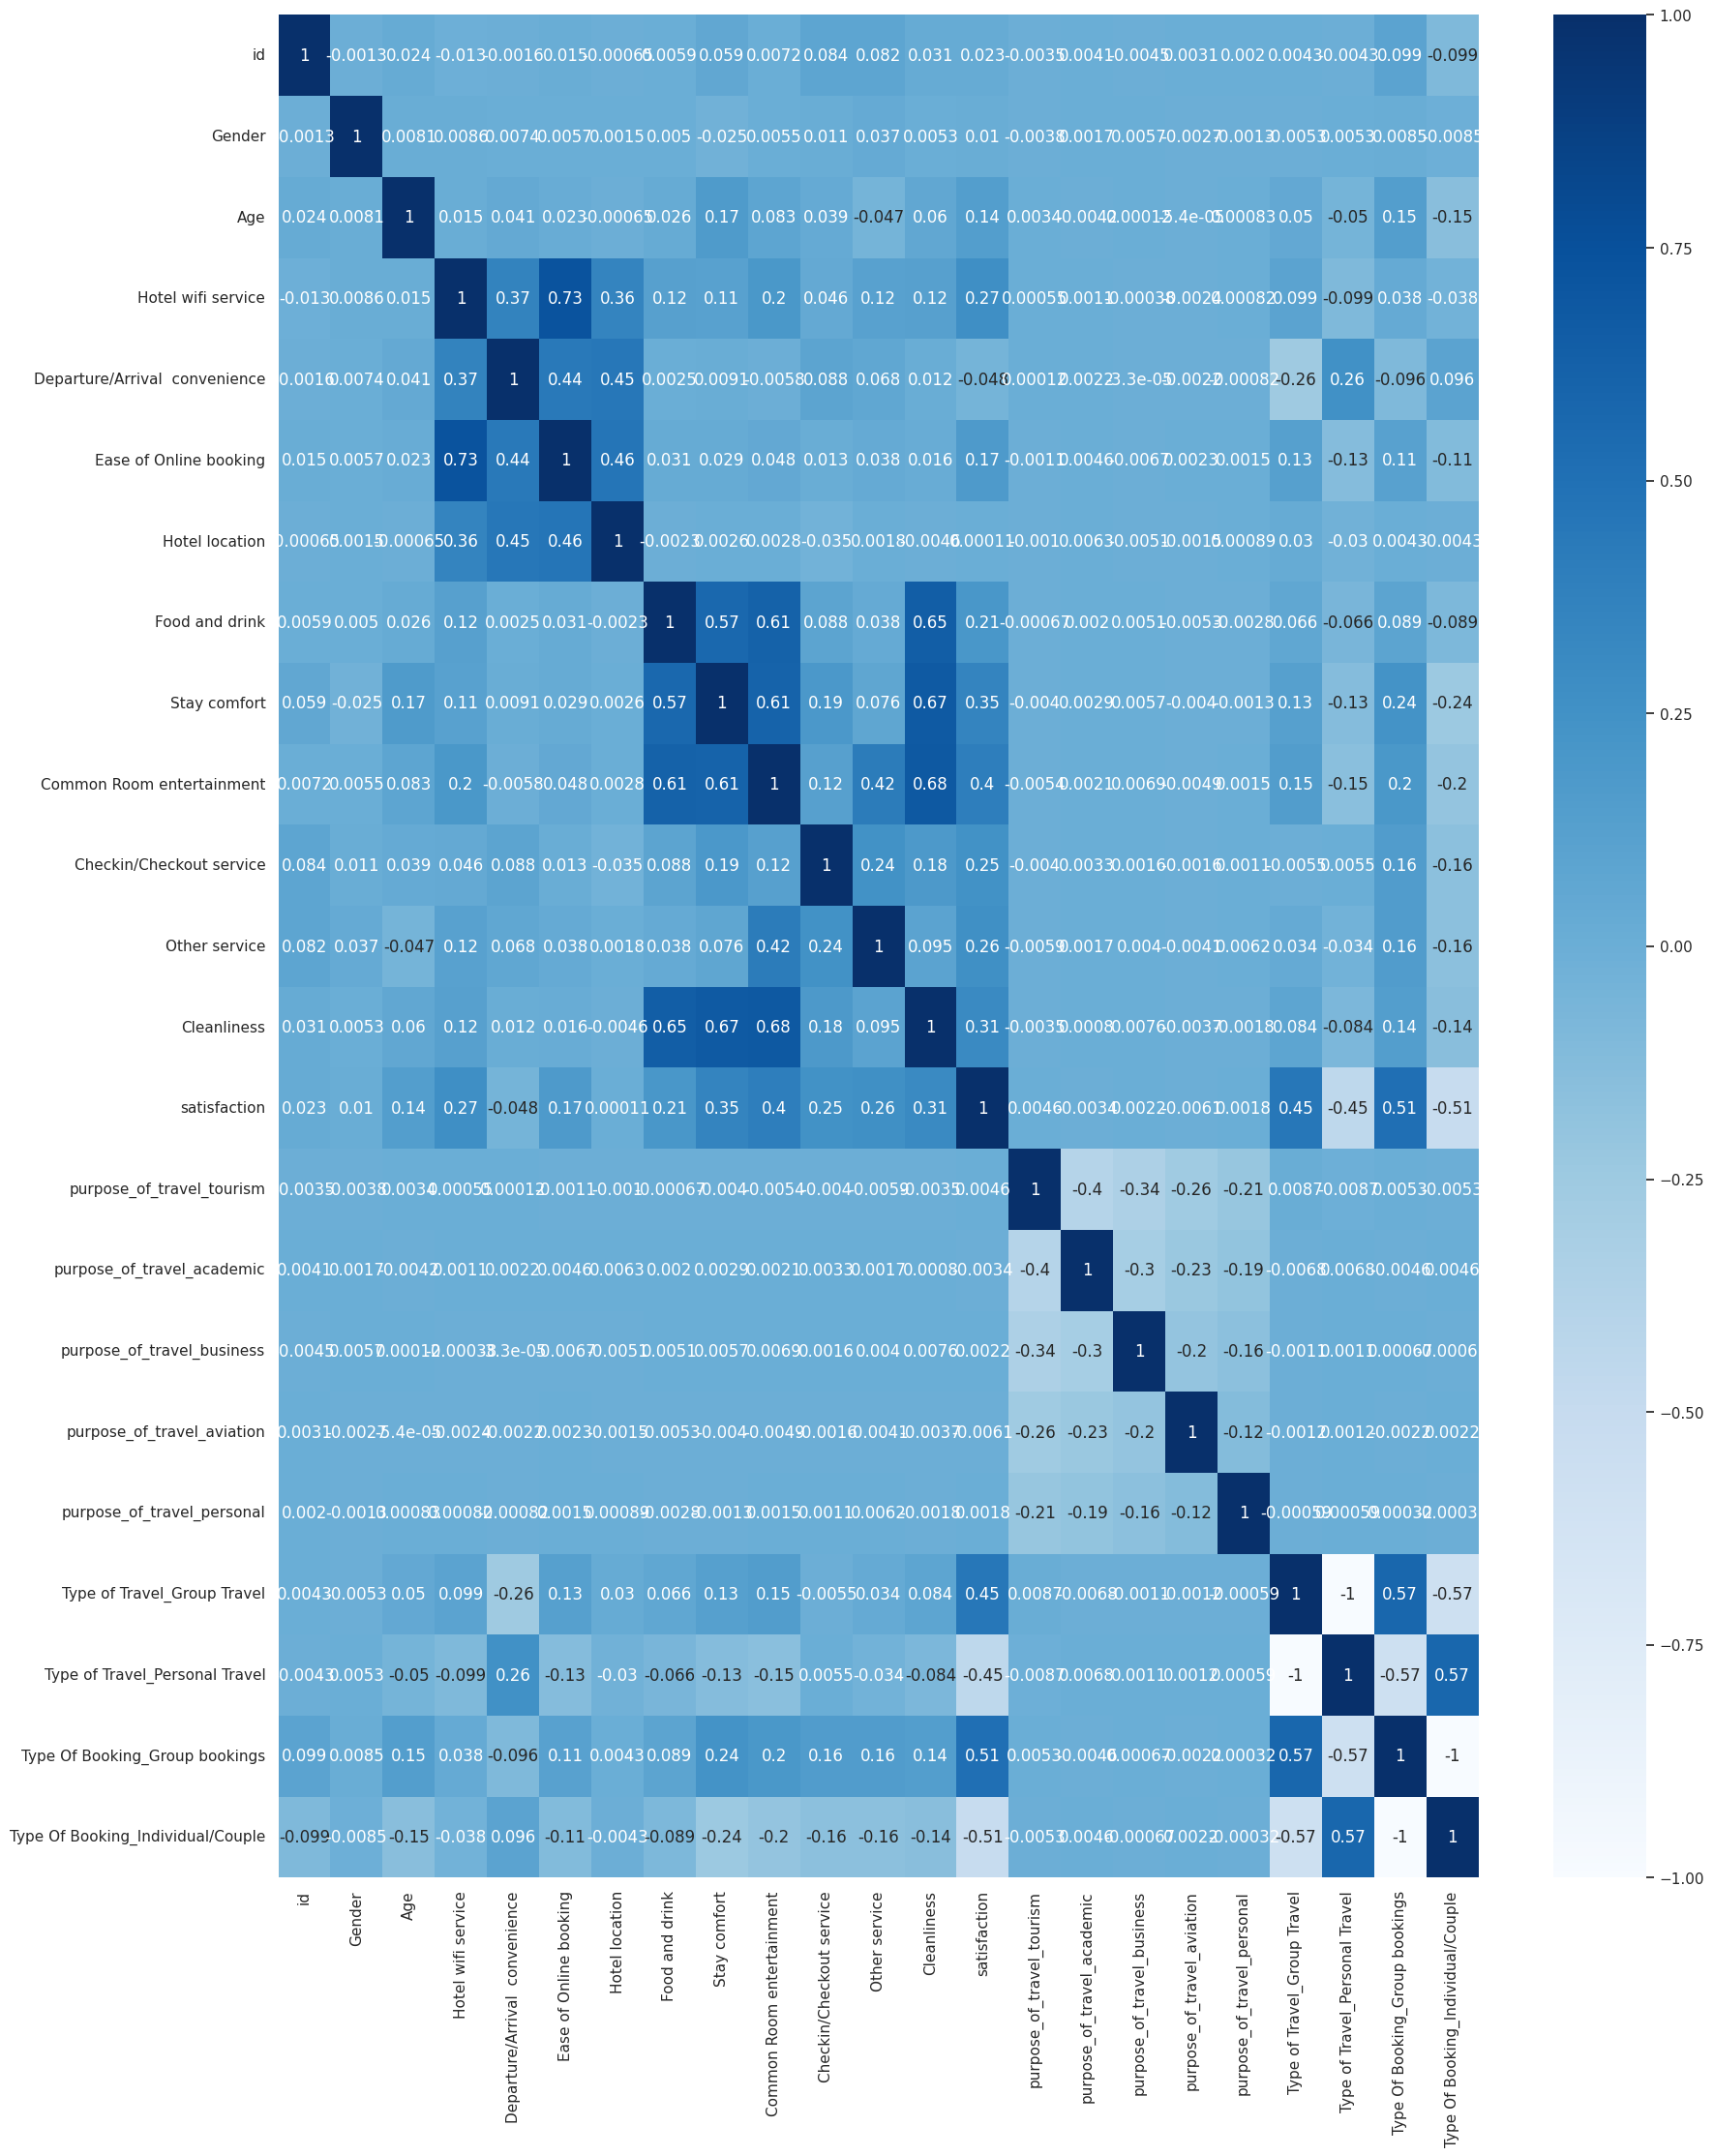

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(20,25))
sns.set(font_scale=1)
sns.heatmap(corr_matrix, annot=True, cmap='Blues',fmt='.2g' )

plt.show()

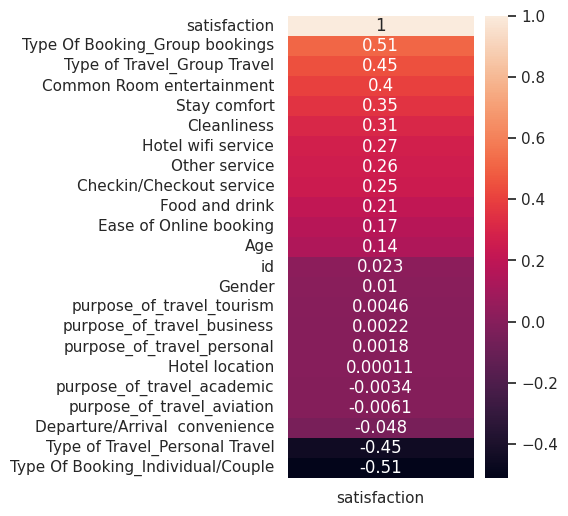

In [ ]:
plt.figure(figsize=(3,6))
sns.heatmap(corr_matrix[['satisfaction']].sort_values(by=['satisfaction'],ascending=False,),annot=True)
plt.show()

# Modelling